# Fuzzy論理の実装

## Overview

Fuzzy(ファジィ)論理の実装. モジュール `src.fuzzy` に `Fuzzy` クラスとして実装しています.

## Usage

### Initialize

ファジィ集合の台集合及び各離散値におけるグレード値を渡すことで初期化できます.  
例えば、

 - 離散値: 年齢 (0~15歳)
 - 判断基準: 幼児かどうか
 - グレード値: 0.3/0, 0.6/1, 1.0/2, 0.5/3, 0.2/4

のようなファジィ集合を定義する場合、以下のように定義します:

In [4]:
from src import Fuzzy

underlying_set = list(range(16))
grades = {0:0.3, 1:0.6, 2:1.0, 3:0.5, 4:0.2}
age_fuzzy = Fuzzy(underlying_set, grades, "Age")

print(age_fuzzy.set_repr)

0.3/0,0.6/1,1.0/2,0.5/3,0.2/4


*表現1* 形式でフォーマットされたグレード値文字列をベースとして初期化することも可能です:

In [5]:
age_fuzzy = Fuzzy.parse_from(underlying_set, "0.3/0,0.6/1,1.0/2,0.5/3,0.2/4", "Age_parsed")
print(age_fuzzy.set_repr)

0.3/0,0.6/1,1.0/2,0.5/3,0.2/4


(上記の通り、プロパティ `Fuzzy.set_repr` により *集合1*形式でフォーマットされたファジィ集合を得ることができます.)

### Operation

`Fuzzy` オブジェクトは以下の演算が可能です:

 - **積**: 演算子をオーバーロードしています. `A & B` で各集合の積を取ることができます.
 - **和**: 積と同様です. `A | B` で各集合の和を取ることができます.
 - **補集合**: プロパティにより実装しています. `A.inversed` で補集合を取ることができます.



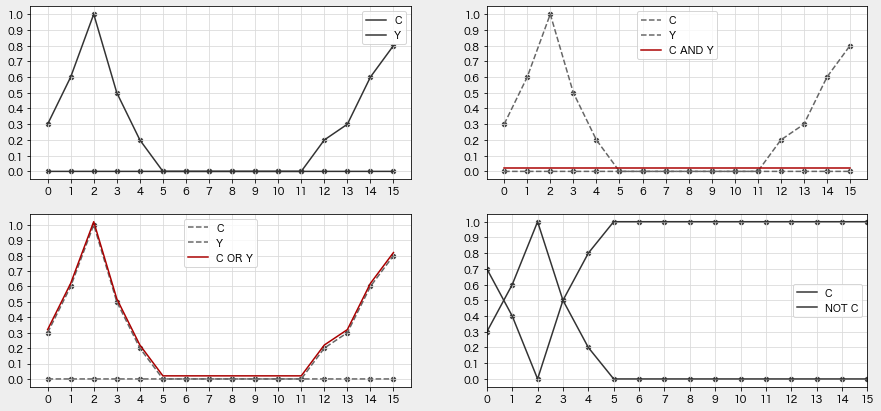

In [6]:
children_fuzzy = Fuzzy.parse_from(underlying_set, "0.3/0,0.6/1,1.0/2,0.5/3,0.2/4", "C")
youths_fuzzy = Fuzzy.parse_from(underlying_set, "0.2/12,0.3/13,0.6/14,0.8/15", "Y")

import matplotlib.pyplot as plt
import helper

# 2x2=4枚のグラフ領域を初期化
axes = helper.init_canvas((15,7), (2,2))

# 描画
helper.draw([children_fuzzy, youths_fuzzy], axes[0])
helper.draw([children_fuzzy, youths_fuzzy, children_fuzzy & youths_fuzzy], axes[1], (2,))
helper.draw([children_fuzzy, youths_fuzzy, children_fuzzy | youths_fuzzy], axes[2], (2,))
helper.draw([children_fuzzy, children_fuzzy.inversed], axes[3])

plt.show()